<a href="https://colab.research.google.com/github/gyrsh/Machine_Learning/blob/master/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets,svm
from __future__ import print_function,division
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
data=pd.read_csv("Iris.csv")

In [5]:

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [0]:
iris=datasets.load_iris()
X=iris.data[:,:2]
Y=iris.target

In [0]:
#X,Y-dataset is in the form of numpy array

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.75,random_state=42)

In [0]:
def evaluate_test_data(mode1=None):
  predictions=model.predict(x_test)
  misclassification=0;
  for i in range(len(y_test)):
    if predictions[i]!=y_test[i]:
      misclassification+=1
  accuracy=100-((100*misclassification)/len(y_test))
  return accuracy

In [12]:
kernels=['linear','poly','rbf']
accuracies=[]
for index,kernel in enumerate(kernels):
  model=svm.SVC(kernel=kernel)
  model.fit(x_train,y_train)
  acc=evaluate_test_data(model)
  accuracies.append(acc)
  print("{} kernel gives accuracy {}".format(kernel,acc))

linear kernel gives accuracy 84.21052631578948
poly kernel gives accuracy 81.57894736842105
rbf kernel gives accuracy 84.21052631578948


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [15]:
#visualing the data
svc=svm.SVC(kernel='linear').fit(x_train,y_train)
svc_poly=svm.SVC(kernel='poly',degree=3).fit(x_train,y_train)
svc_rbf=svm.SVC(kernel='rbf',gamma=0.7).fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [0]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

In [0]:
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

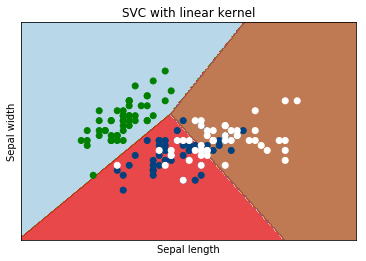

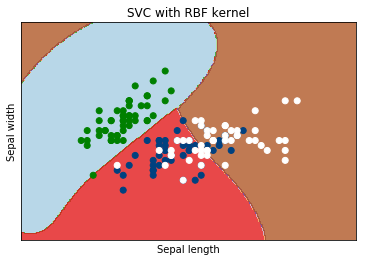

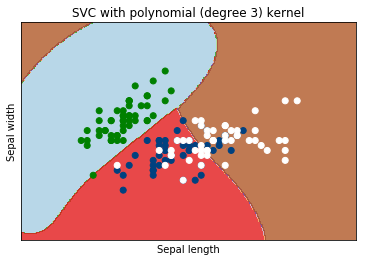

In [41]:
for i, clf in enumerate((svc, svc_rbf, svc_rbf)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(i)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.ocean)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()